In [1]:
import pxi4jss
import cpntools4py
import pprint
from collections import defaultdict
import plotly.io as pio
import plotly.figure_factory as ff
import pandas as pd

## Reading XML to solving Ising model

In [2]:
# Read petrinet created by CPN Tools
xml_path = '../inputs/jss_job4.xml'
xml_doc = cpntools4py.read_xml(xml_path)
cpn = cpntools4py.CPN(xml_doc)
# To snakes objects
snakes_net = cpntools4py.to_snakes(cpn)
# Generating ising model and solving it
res = pxi4jss.main(snakes_net)

## Solution

In [3]:
res['solution']['energy']

0.0

In [4]:
res['solution']['end_time']

25

In [5]:
res['topology']['jobs'] # key: job, value: task

{0: ['t4', 't5', 't6', 't7'],
 1: ['t0', 't1', 't2', 't3'],
 2: ['t8', 't9', 't10', 't11'],
 3: ['t12', 't13', 't14', 't15']}

## Plot graph

In [6]:
def plot_graph(resources_by_trans, pt, jobs, decoded_solution, mode='simulator'):
    df = []
    df_order = []
    df_machine = []
    job_labels = [f'job{j}' for j in range(len(jobs))]
    resources_exec_time = defaultdict(int)

    for i, sol in decoded_solution:
        machine_i = i // len(jobs[0])
        job_i = machine_i % len(jobs)
        df_order.append(i)

        for t, s in sol.items():
            if s == 1:
                df.append(
                    dict(Task=f"Task{i}",
                         Start=t,
                         Finish=t + pt[f"t{i}"],
                         Resource=job_labels[job_i]))
                resource = list(resources_by_trans[f"t{i}"])[0]
                df_machine.append(
                    dict(Task=resource,
                         Start=t,
                         Finish=t + pt[f"t{i}"],
                         Resource=job_labels[job_i]))
                resources_exec_time[resource] += pt[f"t{i}"]

    print(f'resources exec time: {dict(resources_exec_time)}')

    # sort operation
    df_order.sort()
    df_order = [f'Operation{i}' for i in df_order]
    df = pd.DataFrame(df)
    df['order'] = df['Task'].apply(
        lambda x: df_order.index(x) if x in df_order else -1)

    # plot figures
    fig_operation = ff.create_gantt(df.sort_values('order'), index_col='Resource', title='Job Shop Schedule',
                                    show_colorbar=True, showgrid_x=True, showgrid_y=True, group_tasks=True)
    fig_operation.update_xaxes(type="linear")
#     fig_operation.show() # Not show at github preview
    fig_operation.write_image("../images/jss_job4_operation.png")
    
    fig_machine = ff.create_gantt(df_machine, index_col='Resource', title='Job Shop Schedule',
                                  show_colorbar=True, showgrid_x=True, showgrid_y=True, group_tasks=True)
    fig_machine.update_xaxes(type="linear")
#     fig_operation.show() # Not show at github preview
    fig_machine.write_image("../images/jss_job4_machine.png")
    
topology = res['topology']
plot_graph(resources_by_trans= topology['resources_by_trans'],
           pt=topology['processing_times'], jobs=topology['jobs'],
           decoded_solution=res['solution']['spins'])


resources exec time: {'m0': 10, 'm1': 11, 'm2': 9}


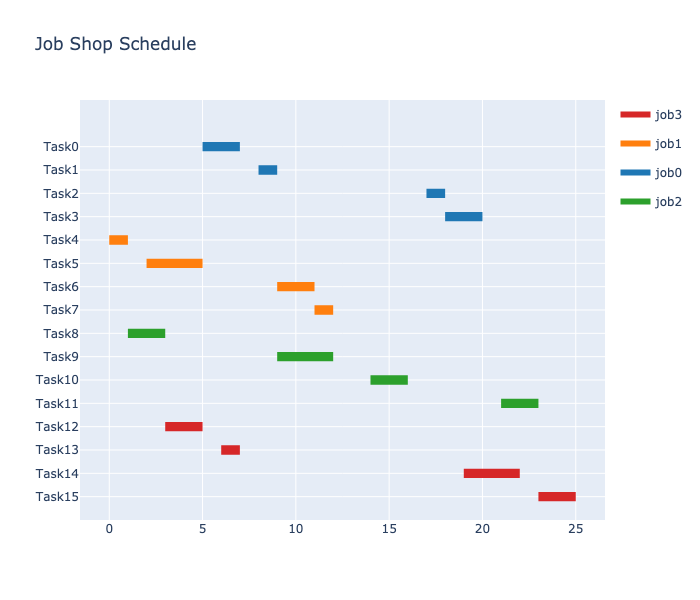

In [7]:
from IPython.display import Image 
Image("../images/jss_job4_operation.png") 

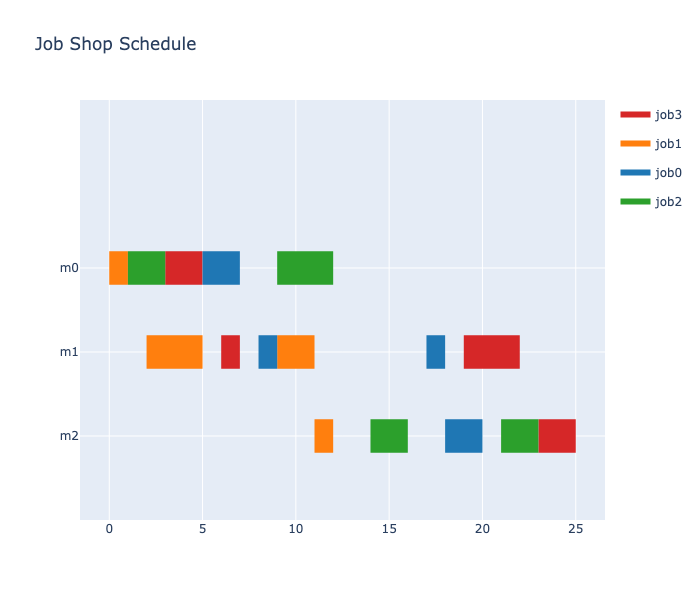

In [8]:
Image("../images/jss_job4_machine.png")

## Return values
Return values are a dictionary type.
1. topology: Topology of input data.
2. solution: Information on the calculated solution.

In [9]:
res['topology']

{'jobs': {0: ['t4', 't5', 't6', 't7'],
  1: ['t0', 't1', 't2', 't3'],
  2: ['t8', 't9', 't10', 't11'],
  3: ['t12', 't13', 't14', 't15']},
 'processing_times': {'t1': 1,
  't2': 1,
  't3': 2,
  't0': 2,
  't4': 1,
  't6': 2,
  't7': 1,
  't5': 3,
  't8': 2,
  't9': 3,
  't10': 2,
  't11': 2,
  't12': 2,
  't13': 1,
  't14': 3,
  't15': 2},
 'resources_by_trans': {'t1': {'m1'},
  't2': {'m1'},
  't3': {'m2'},
  't0': {'m0'},
  't4': {'m0'},
  't6': {'m1'},
  't7': {'m2'},
  't5': {'m1'},
  't8': {'m0'},
  't9': {'m0'},
  't10': {'m2'},
  't11': {'m2'},
  't12': {'m0'},
  't13': {'m1'},
  't14': {'m1'},
  't15': {'m2'}},
 'num_var': 464}

In [10]:
pprint.pprint(res['solution'])

{'end_time': 25,
 'energy': 0.0,
 'spins': [(0,
            {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 1,
             6: 0,
             7: 0,
             8: 0,
             9: 0,
             10: 0,
             11: 0,
             12: 0,
             13: 0,
             14: 0,
             15: 0,
             16: 0,
             17: 0,
             18: 0,
             19: 0,
             20: 0,
             21: 0,
             22: 0,
             23: 0}),
           (1,
            {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0,
             7: 0,
             8: 1,
             9: 0,
             10: 0,
             11: 0,
             12: 0,
             13: 0,
             14: 0,
             15: 0,
             16: 0,
             17: 0,
             18: 0,
             19: 0,
             20: 0,
             21: 0,
             22: 0,
             23